<a href="https://colab.research.google.com/github/two-phaseflow/JAR513M/blob/main/Week2_GroupAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **JAR513 Week 2 - Group Assignment**

Welcome to the Week 2 Group Assignment: “Geology, Reserves & Production Modeling.” This notebook guides you through data wrangling, plotting, and fitting simple logistic (Hubbert-style) curves to historical production data. You'll analyze fossil fuels and uranium, compare production trends, and reflect on how geology, efficiency, and policy intersect with resource dynamics.

> Add blockquote



In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Now using pandas we can read in our file and create a dataframe.

In [6]:
df = pd.read_csv("unobtanium_production_data.csv", skiprows=1)

`read_csv` is a function inside of the pandas library. `skiprows` is an argument. We skip the first row because this first row only provides background information and is not part of the dataset. We can start to investigate the dataset.



In [7]:
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Zentopia,13,15,18,23,26,33,40,42,49,...,133,125,96,91,78,65,52,46,40,32
1,Fictonia,75,103,131,144,165,170,220,228,199,...,253,255,249,218,184,178,172,134,121,95
2,Imaginaria,12,10,12,11,10,11,11,11,10,...,142,149,148,149,167,196,203,211,222,241
3,Pseudoland,410,368,337,296,273,256,256,292,294,...,179,186,195,182,194,198,172,167,150,131
4,Mythshire,174,170,204,188,199,228,211,213,232,...,421,462,495,513,487,535,549,502,482,485


We can see that the data is in *wide format*. However, for analysis using `pandas` and `matplotlib`, we need to change this into long/tidy format.

In [10]:
df_long = df.melt(id_vars="Country", var_name="Year", value_name="Production")
df_long.head()

,Country,Year,Production
0,Zentopia,1970,13
1,Fictonia,1970,75
2,Imaginaria,1970,12
3,Pseudoland,1970,410
4,Mythshire,1970,174


Now we can do different things.

In [12]:
df_long["Year"] = df_long["Year"].astype(int)
df_long["Production"] = pd.to_numeric(df_long["Production"], errors="coerce")

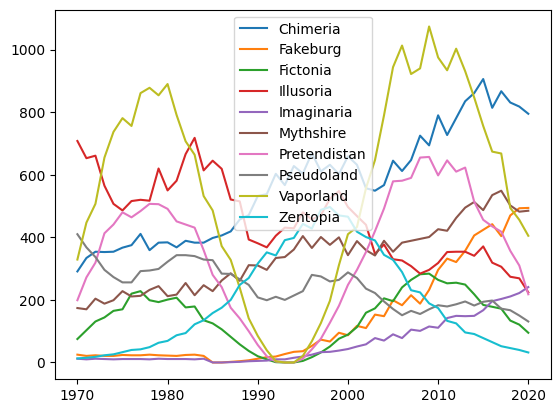

In [13]:
for country, subset in df_long.groupby("Country"):
    plt.plot(subset["Year"], subset["Production"], label=country)
plt.legend()
plt.show()